In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [38]:
def load_images_from_folder(folder_path1,folder_path2):
    
    images = []
    shape = (224, 224)
    
    for filename in os.listdir(folder_path1):
        img = cv2.imread(os.path.join(folder_path1, filename))
        img = cv2.resize(img, shape)
        
        if img is not None:
            images.append(img)
    
    for filename in os.listdir(folder_path2):
        img = cv2.imread(os.path.join(folder_path2, filename))
        img = cv2.resize(img, shape)
        
        if img is not None:
            images.append(img) 
    return np.array(images)

In [39]:
def show_image(image):
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

In [40]:
images=load_images_from_folder('MRIimages/brain/','MRIimages/breast/')
images=images.astype('float32') / 255

In [41]:
print(type(images))

<class 'numpy.ndarray'>


In [42]:
print(images.shape)

(1981, 224, 224, 3)


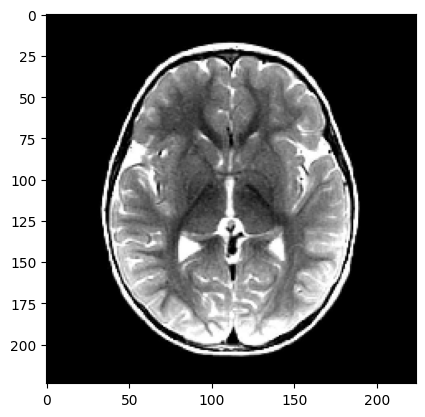

In [43]:
show_image(images[0])

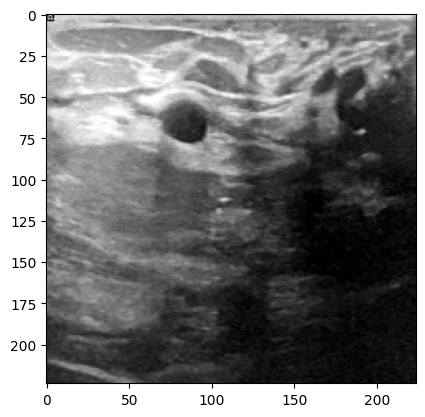

In [44]:
show_image(images[1500])

In [45]:
def output(folderpath1,folderpath2):
    outputs=[]
    for filename in os.listdir(folderpath1):
        img = cv2.imread(os.path.join(folderpath1, filename))
        if img is not None:
            outputs.append(0)
    for filename in os.listdir(folderpath2):
        img = cv2.imread(os.path.join(folderpath2, filename))
        if img is not None:
            outputs.append(1)
    return np.array(outputs)
        

In [46]:
outputs=output('MRIimages/brain/','MRIimages/breast/')

In [47]:
print(outputs)

[0 0 0 ... 1 1 1]


In [48]:
print(outputs.shape)

(1981,)


In [49]:
print(outputs.shape)
print(outputs[0])
print(outputs[1500])

(1981,)
0
1


In [50]:
X_train, X_test, y_train, y_test = train_test_split(images, outputs, test_size=0.3, random_state=1, stratify=outputs)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1386, 224, 224, 3)
(1386,)
(595, 224, 224, 3)
(595,)


In [52]:
#build model
model =  Sequential()

#feature extraction
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu'))    
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.25))
        
# Classification 
model.add(Flatten())

model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=1, activation= 'sigmoid'))

model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 32)      

In [53]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
44/44 [==============================] - 206s 5s/step - loss: 0.2213 - accuracy: 0.9228 - val_loss: 0.0355 - val_accuracy: 0.9882
Epoch 2/15
44/44 [==============================] - 208s 5s/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0444 - val_accuracy: 0.9916
Epoch 3/15
44/44 [==============================] - 186s 4s/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0541 - val_accuracy: 0.9899
Epoch 4/15
44/44 [==============================] - 185s 4s/step - loss: 0.0098 - accuracy: 0.9964 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 5/15
44/44 [==============================] - 190s 4s/step - loss: 7.3117e-04 - accuracy: 1.0000 - val_loss: 4.6177e-04 - val_accuracy: 1.0000
Epoch 6/15
44/44 [==============================] - 186s 4s/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 0.0149 - val_accuracy: 0.9950
Epoch 7/15
44/44 [==============================] - 180s 4s/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0128 - val_accuracy: 0.9950
Epoch

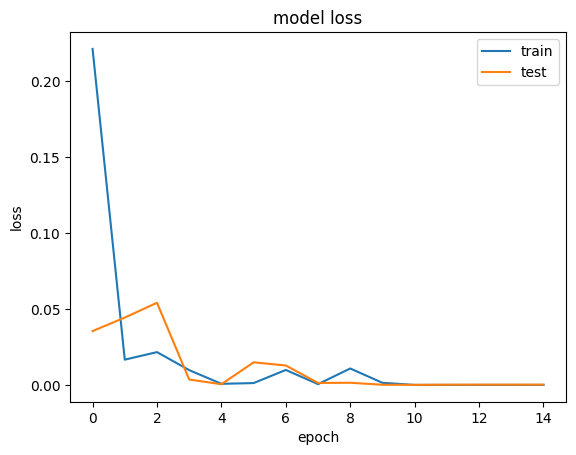

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

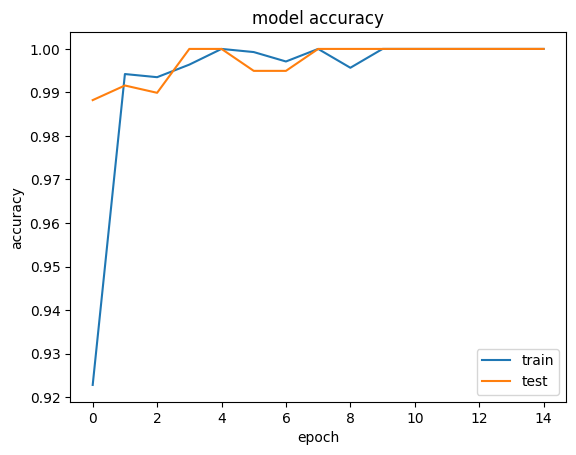

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [57]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 17s 867ms/step - loss: 1.9720e-04 - accuracy: 1.0000


[0.00019720332056749612, 1.0]

In [58]:
y_pred = model.predict(X_test)

19/19 [==============================] - 16s 831ms/step


In [59]:
y_pred.shape

(595, 1)

In [60]:
type(y_pred)

numpy.ndarray

In [61]:
y_pred[:5]

array([[1.0000000e+00],
       [9.9999815e-01],
       [1.2800529e-17],
       [5.6385790e-10],
       [9.9999988e-01]], dtype=float32)

In [62]:
y_predSCALED=[]
for i in y_pred:
    if i>=0.5:
        y_predSCALED.append(1)
    else:
        y_predSCALED.append(0)


In [63]:
y_predSCALED=np.array(y_predSCALED)

In [64]:
type(y_predSCALED)

numpy.ndarray

In [65]:
y_predSCALED[:5]

array([1, 1, 0, 0, 1])

In [70]:
y_predSCALED.shape

(595,)

In [67]:
print(classification_report(y_test, y_predSCALED))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00       234

    accuracy                           1.00       595
   macro avg       1.00      1.00      1.00       595
weighted avg       1.00      1.00      1.00       595

